RandomForestRegressor()



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s finished



On Training Data:
SUOD ROC:0.9981, precision @ rank n:0.95

On Test Data:
SUOD ROC:1.0, precision @ rank n:1.0


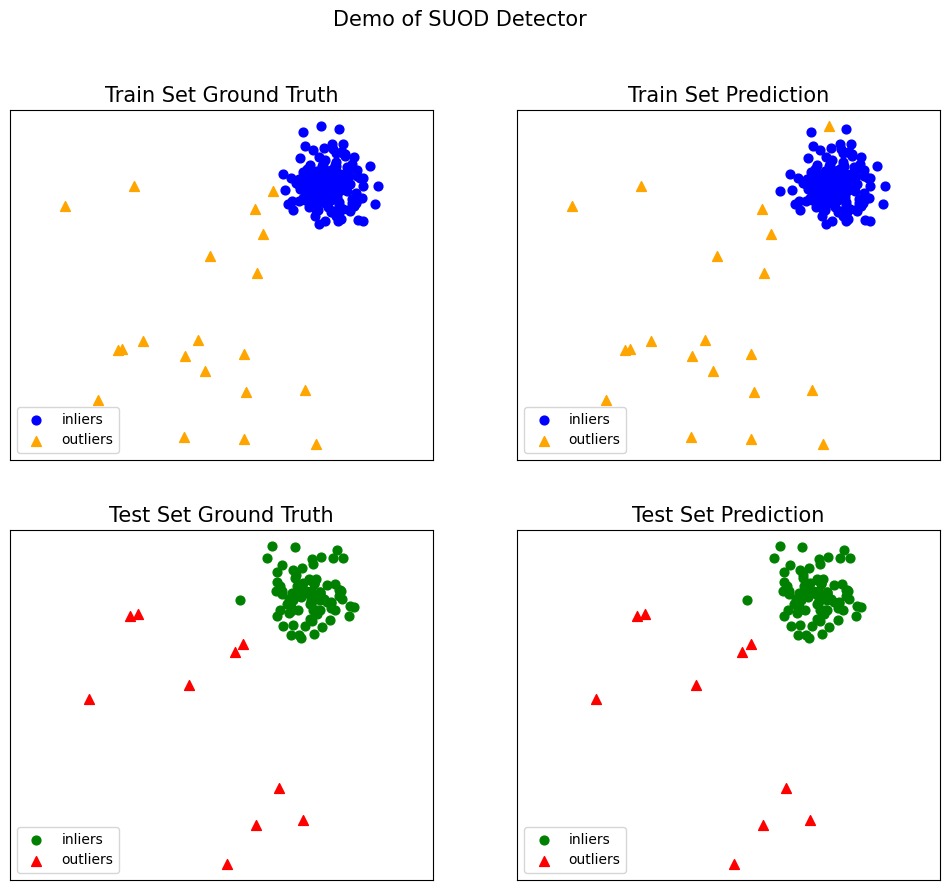

In [5]:
# -*- coding: utf-8 -*-
"""Example of using SUOD for accelerating outlier detection
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

from pyod.models.suod import SUOD
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.copod import COPOD
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train SUOD
    clf_name = 'SUOD'

    # initialized a group of outlier detectors for acceleration
    detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
                     LOF(n_neighbors=25), LOF(n_neighbors=35),
                     COPOD(), IForest(n_estimators=100),
                     IForest(n_estimators=200)]

    # decide the number of parallel process, and the combination method
    clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average',
               verbose=False)

    # or to use the default detectors
    # clf = SUOD(n_jobs=2, combination='average',
    #            verbose=False)
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

In [1]:
import pandas as pd
import numpy as np

def simple_random_data(size=100, n_columns=5):
    # Generar datos aleatorios para las columnas
    data = np.random.rand(size, n_columns)
    
    # Crear el DataFrame con los datos aleatorios
    df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(n_columns)])
    
    # Agregar la columna 'label' con valores 0 o 1
    df['label'] = np.random.randint(0, 2, size=size)
    
    return df

simple_random_data()

,col_0,col_1,col_2,col_3,col_4,label
0,0.646179,0.412768,0.008289,0.568684,0.362665,0
1,0.484677,0.557998,0.464636,0.489743,0.273796,1
2,0.809072,0.925486,0.278952,0.117356,0.599674,1
3,0.396364,0.901632,0.516814,0.757142,0.524307,0
4,0.439480,0.484197,0.484889,0.419291,0.490127,1
...,...,...,...,...,...,...
95,0.946168,0.424499,0.638288,0.270579,0.428607,0
96,0.776015,0.820235,0.298291,0.330122,0.438948,1
97,0.721214,0.035303,0.025371,0.299030,0.811920,1
98,0.156334,0.314348,0.641825,0.840306,0.799189,0


In [2]:
my_dict = {'a': [1,2], 'b': [3,4], 'c': [5,6]}

# Obtener el primer elemento (clave, valor)
first_item = next(iter(my_dict.values()))
print(first_item)


[1, 2]


In [6]:
import pandas as pd
import numpy as np

def modificar_dataframe(df):
    # Número de filas y columnas del DataFrame
    num_filas = len(df)
    num_columnas = len(df.columns[:-1])
    
    # Seleccionar aleatoriamente el 10% de las filas
    num_filas_modificar = int(num_filas * 0.80)
    filas_modificar = np.random.choice(df.index, size=num_filas_modificar, replace=False)
    
    # Seleccionar aleatoriamente un número de columnas (entre 1 y el número total de columnas)
    num_columnas_modificar = np.random.randint(1, num_columnas + 1)
    columnas_modificar = np.random.choice(df.columns[:-1], size=num_columnas_modificar, replace=False)
    
    # Modificar los valores de las filas y columnas seleccionadas en un 15%
    for fila in filas_modificar:
        for columna in columnas_modificar:
            df.at[fila, columna] *= 1.15
            df.at[fila, 'label'] = 1
            
    return df

# Ejemplo de uso
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500],
    'D': [1000, 2000, 3000, 4000, 5000],
    'E': [1000, 2000, 3000, 4000, 5000],
    'F': [1000, 2000, 3000, 4000, 5000],
    'G': [1000, 2000, 3000, 4000, 5000],
    'H': [1000, 2000, 3000, 4000, 5000],
    'I': [1000, 2000, 3000, 4000, 5000],
    'J': [1000, 2000, 3000, 4000, 5000],
    'K': [1000, 2000, 3000, 4000, 5000]
}

df = pd.DataFrame(data)
df['label'] = 0
print("DataFrame original:")
print(df)

df_modificado = modificar_dataframe(df.copy())
print("\nDataFrame modificado:")
print(df_modificado)


DataFrame original:
   A   B    C     D     E     F     G     H     I     J     K  label
0  1  10  100  1000  1000  1000  1000  1000  1000  1000  1000      0
1  2  20  200  2000  2000  2000  2000  2000  2000  2000  2000      0
2  3  30  300  3000  3000  3000  3000  3000  3000  3000  3000      0
3  4  40  400  4000  4000  4000  4000  4000  4000  4000  4000      0
4  5  50  500  5000  5000  5000  5000  5000  5000  5000  5000      0

DataFrame modificado:
      A     B      C       D       E       F       G       H       I       J  \
0  1.15  11.5  115.0  1150.0  1150.0  1150.0  1150.0  1150.0  1150.0  1150.0   
1  2.00  20.0  200.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0   
2  3.45  34.5  345.0  3450.0  3450.0  3450.0  3450.0  3450.0  3450.0  3450.0   
3  4.60  46.0  460.0  4600.0  4600.0  4600.0  4600.0  4600.0  4600.0  4600.0   
4  5.75  57.5  575.0  5750.0  5750.0  5750.0  5750.0  5750.0  5750.0  5750.0   

        K  label  
0  1150.0      1  
1  2000.0      0  
2  34

/tmp/ipykernel_4086888/4276727314.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[fila, columna] *= 1.15
/tmp/ipykernel_4086888/4276727314.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '459.99999999999994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[fila, columna] *= 1.15
/tmp/ipykernel_4086888/4276727314.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '57.49999999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[fila, columna] *= 1.15
/tmp/ipykernel_4086888/4276727314.py:20: FutureWarning: Setting an item of incompatible dtyp